In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from src import analyze_utils
from typing import Dict
import math

In [27]:
score_directory_frames= "outputs/scores_cgvqm_frames/"
score_directory_regular = "outputs/scores_cgvqm"
score_directory_cvvdp = "outputs/scores_cvdp"

✅ Loaded and sorted data for: Alpha Weight
✅ Loaded and sorted data for: Filter Size
✅ Loaded and sorted data for: Hist Percent
✅ Loaded and sorted data for: Num Samples


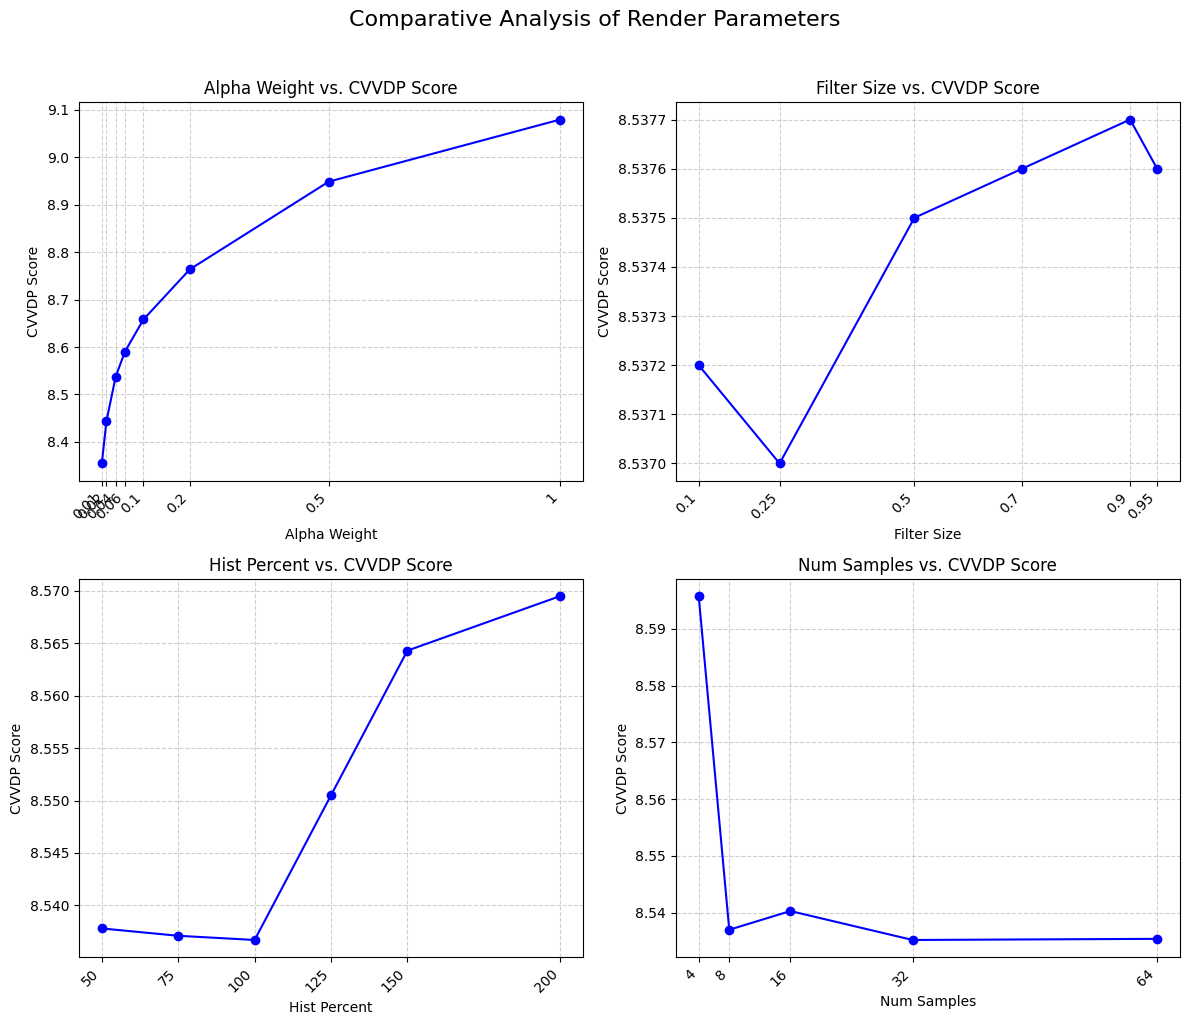

In [32]:
comparison_files_cvvdp = {
    "Alpha Weight": os.path.join(score_directory_cvvdp, 'vary_alpha_weight_scores.json'),
    "Filter Size": os.path.join(score_directory_cvvdp,'vary_filter_size_scores.json'),
    "Hist Percent": os.path.join(score_directory_cvvdp,'vary_hist_percent_scores.json'),
    "Num Samples": os.path.join(score_directory_cvvdp,'vary_num_samples_scores.json'),
}
cvvdp_loaded = analyze_utils.load_multiple_experiments(comparison_files_cvvdp)
cvvdp_data = analyze_utils.compare_render_experiments(cvvdp_loaded,  plot=False)
analyze_utils.plot_experiment_grid(cvvdp_loaded, score_metric="CVVDP Score")



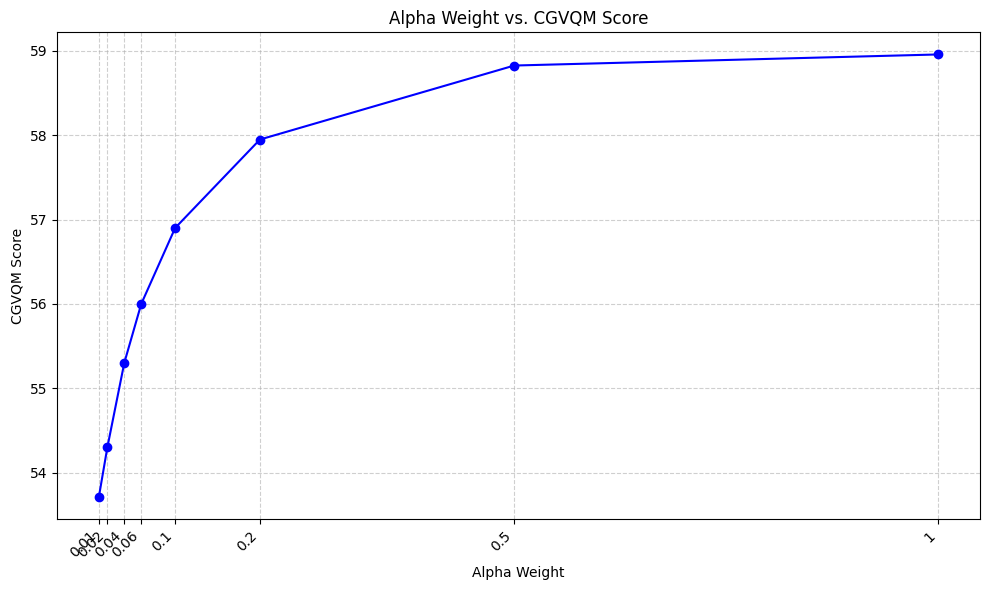

,exp_name,score,num_val
0,vary_alpha_weight_0.01,53.711891,0.01
1,vary_alpha_weight_0.02,54.298481,0.02
2,vary_alpha_weight_0.04,55.300884,0.04
3,vary_alpha_weight_0.06,55.999485,0.06
4,vary_alpha_weight_0.1,56.900173,0.10
5,vary_alpha_weight_0.2,57.948143,0.20
6,vary_alpha_weight_0.5,58.825211,0.50
7,vary_alpha_weight_1.0,58.956535,1.00


In [3]:
score_directory_frames= "outputs/scores_cgvqm_frames/"
score_directory_regular = "outputs/scores_cgvqm"
file_path = 'vary_alpha_weight_scores.json'

full_file_path_frames = os.path.join(score_directory_frames, file_path)
full_file_path_reg = os.path.join(score_directory_regular, file_path)

score_data_dict = analyze_utils.get_dict(full_file_path_reg)

# 3. If data loaded successfully, plot it using the dict-based function
df_results_frames = None # Initialize variable

if score_data_dict is not None:
    # We call the new dictionary-based function, passing the dictionary itself
    df_results_frames = analyze_utils.plot_render_scores_from_dict(
        data_dict=score_data_dict, # <-- The change is passing the dict
        parameter_name="Alpha Weight",
        score_metric="CGVQM Score", # Assuming a default score_metric
        x_evenly_spaced=False
    )

# 4. Display the resulting DataFrame
if df_results_frames is not None:
    display(df_results_frames)

In [3]:
comparison_files_frames = {
    "Alpha Weight": os.path.join(score_directory_frames, 'vary_alpha_weight_scores.json'),
    "Filter Size": os.path.join(score_directory_frames,'vary_filter_size_scores.json'),
    "Hist Percent": os.path.join(score_directory_frames,'vary_hist_percent_scores.json'),
    "Num Samples": os.path.join(score_directory_frames,'vary_num_samples_scores.json'),
}

comparison_files_reg = {
    "Alpha Weight": os.path.join(score_directory_regular, 'vary_alpha_weight_scores.json'),
    "Filter Size": os.path.join(score_directory_regular,'vary_filter_size_scores.json'),
    "Hist Percent": os.path.join(score_directory_regular,'vary_hist_percent_scores.json'),
    "Num Samples": os.path.join(score_directory_regular,'vary_num_samples_scores.json'),
}

In [4]:
frames_loaded = analyze_utils.load_multiple_experiments(comparison_files_frames)
reg_loaded = analyze_utils.load_multiple_experiments(comparison_files_reg)
frames_data = analyze_utils.compare_render_experiments(frames_loaded, plot=False)
reg_data = analyze_utils.compare_render_experiments(reg_loaded,  plot=False)

✅ Loaded and sorted data for: Alpha Weight
✅ Loaded and sorted data for: Filter Size
✅ Loaded and sorted data for: Hist Percent
✅ Loaded and sorted data for: Num Samples
✅ Loaded and sorted data for: Alpha Weight
✅ Loaded and sorted data for: Filter Size
✅ Loaded and sorted data for: Hist Percent
✅ Loaded and sorted data for: Num Samples


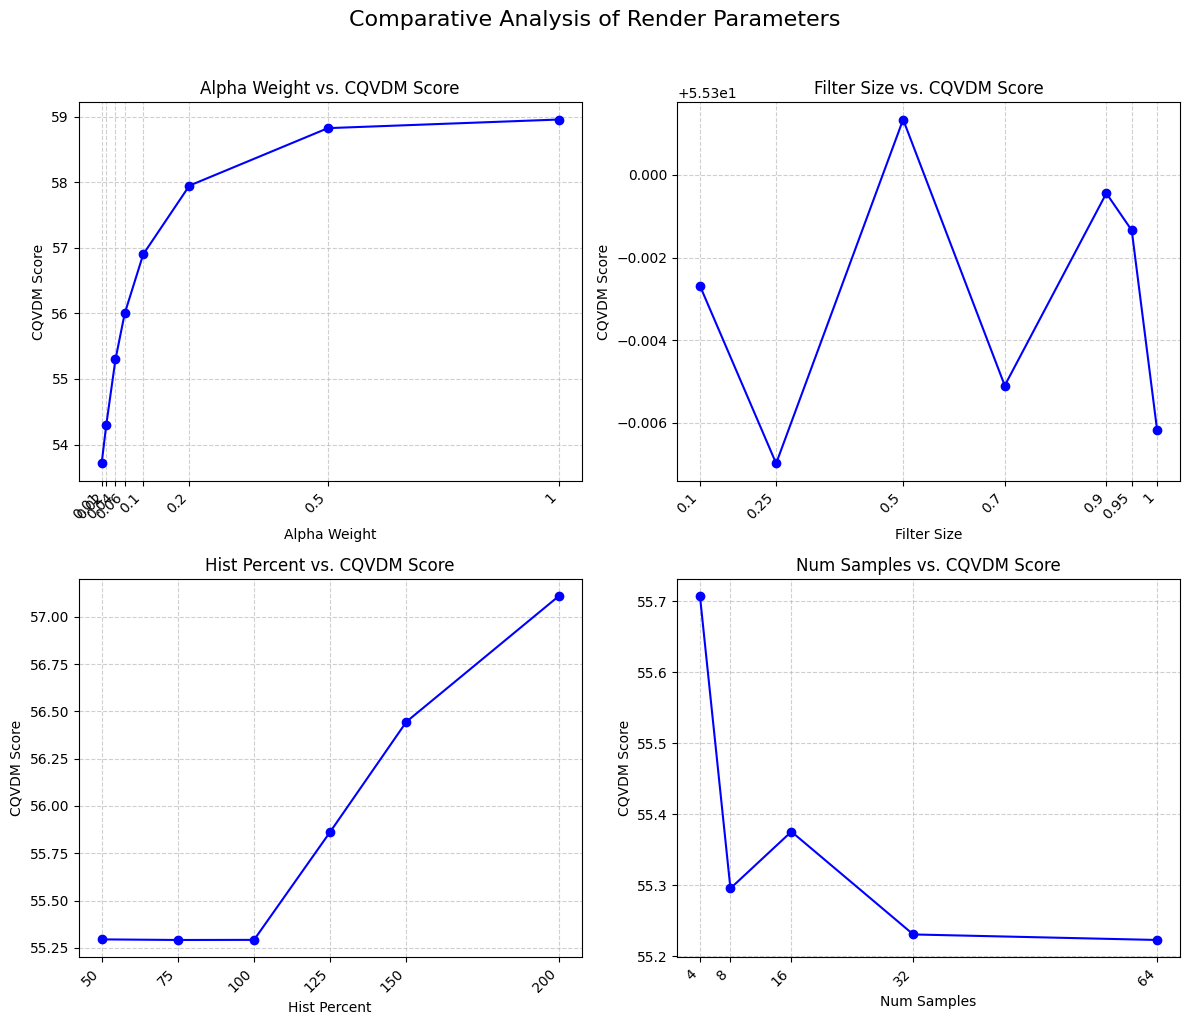

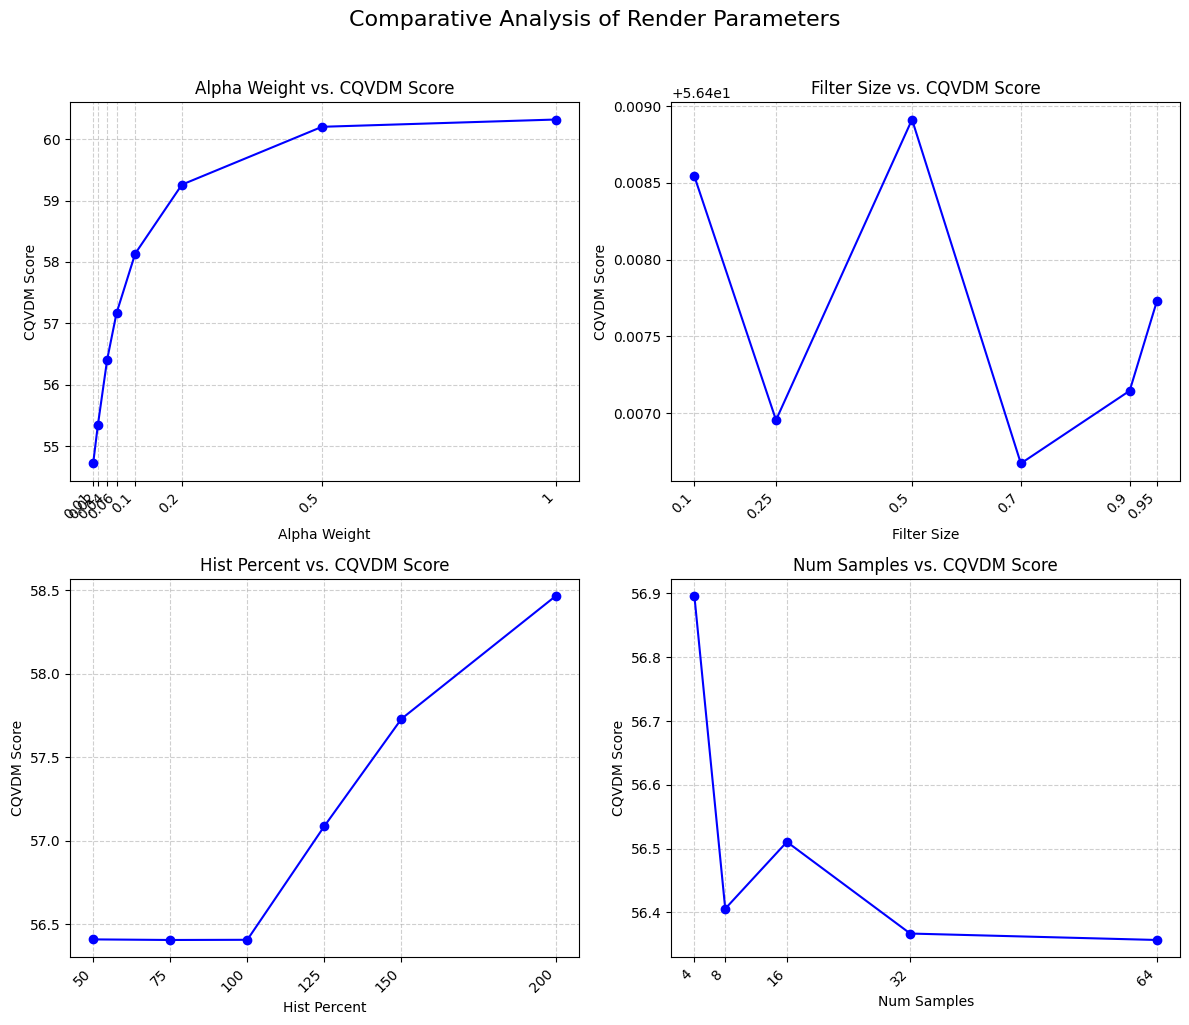

In [ ]:
analyze_utils.plot_experiment_grid(reg_loaded, score_metric="CQVDM Score")
analyze_utils.plot_experiment_grid(frames_loaded, score_metric="CQVDM Score")


In [33]:
frames_summary = analyze_utils.summarize_performance_table(frames_data)
cvvdp_summary = analyze_utils.summarize_performance_table(cvvdp_data)

In [34]:
display(cvvdp_summary)

,experiment_type,best_score,best_score_value,worst_score,worst_score_value,pearson_correlation
0,Alpha Weight,9.0798,1.0,8.3546,0.01,0.907619
1,Filter Size,8.5377,0.9,8.5370,0.25,0.881594
2,Hist Percent,8.5695,200.0,8.5367,100.00,0.929296
3,Num Samples,8.5958,4.0,8.5352,32.00,-0.515639


display(frames_data.groupby('experiment_type')['score'].describe())
display(cvvdp.groupby('experiment_type')['score'].describe())


In [36]:
# Calculate basic descriptive statistics for the 'score' column, grouped by experiment type
frames_describe = frames_data.groupby('experiment_type')['score'].describe()
cvvdp_describe = cvvdp_data.groupby('experiment_type')['score'].describe()
display(frames_describe)
display(cvvdp_describe)

,count,mean,std,min,25%,50%,75%,max
experiment_type,,,,,,,,
Alpha Weight,8.0,57.693139,2.143036,54.719017,56.141788,57.650322,59.494102,60.318890
Filter Size,6.0,56.407660,0.000904,56.406673,56.407003,56.407438,56.408340,56.408913
Hist Percent,6.0,57.083354,0.860725,56.404503,56.406189,56.747452,57.568992,58.465443
Num Samples,5.0,56.507243,0.225581,56.356915,56.366993,56.405880,56.510609,56.895821


,count,mean,std,min,25%,50%,75%,max
experiment_type,,,,,,,,
Alpha Weight,8.0,8.672200,0.247530,8.3546,8.514350,8.62440,8.81005,9.0798
Filter Size,6.0,8.537433,0.000273,8.5370,8.537275,8.53755,8.53760,8.5377
Hist Percent,6.0,8.549317,0.014658,8.5367,8.537275,8.54415,8.56085,8.5695
Num Samples,5.0,8.548740,0.026387,8.5352,8.535400,8.53700,8.54030,8.5958


In [8]:
score_summary = reg_data.groupby('experiment_type')['score'].describe()
display(score_summary)

,count,mean,std,min,25%,50%,75%,max
experiment_type,,,,,,,,
Alpha Weight,8.0,56.492600,2.000236,53.711891,55.050283,56.449829,58.167410,58.956535
Filter Size,7.0,55.296945,0.003125,55.293018,55.294361,55.297318,55.299109,55.301342
Hist Percent,6.0,55.882971,0.756851,55.291954,55.293170,55.579348,56.299874,57.109352
Num Samples,5.0,55.366437,0.200172,55.222965,55.230755,55.295635,55.375530,55.707298


In [12]:
reg_summary = analyze_utils.summarize_performance_table(reg_data)

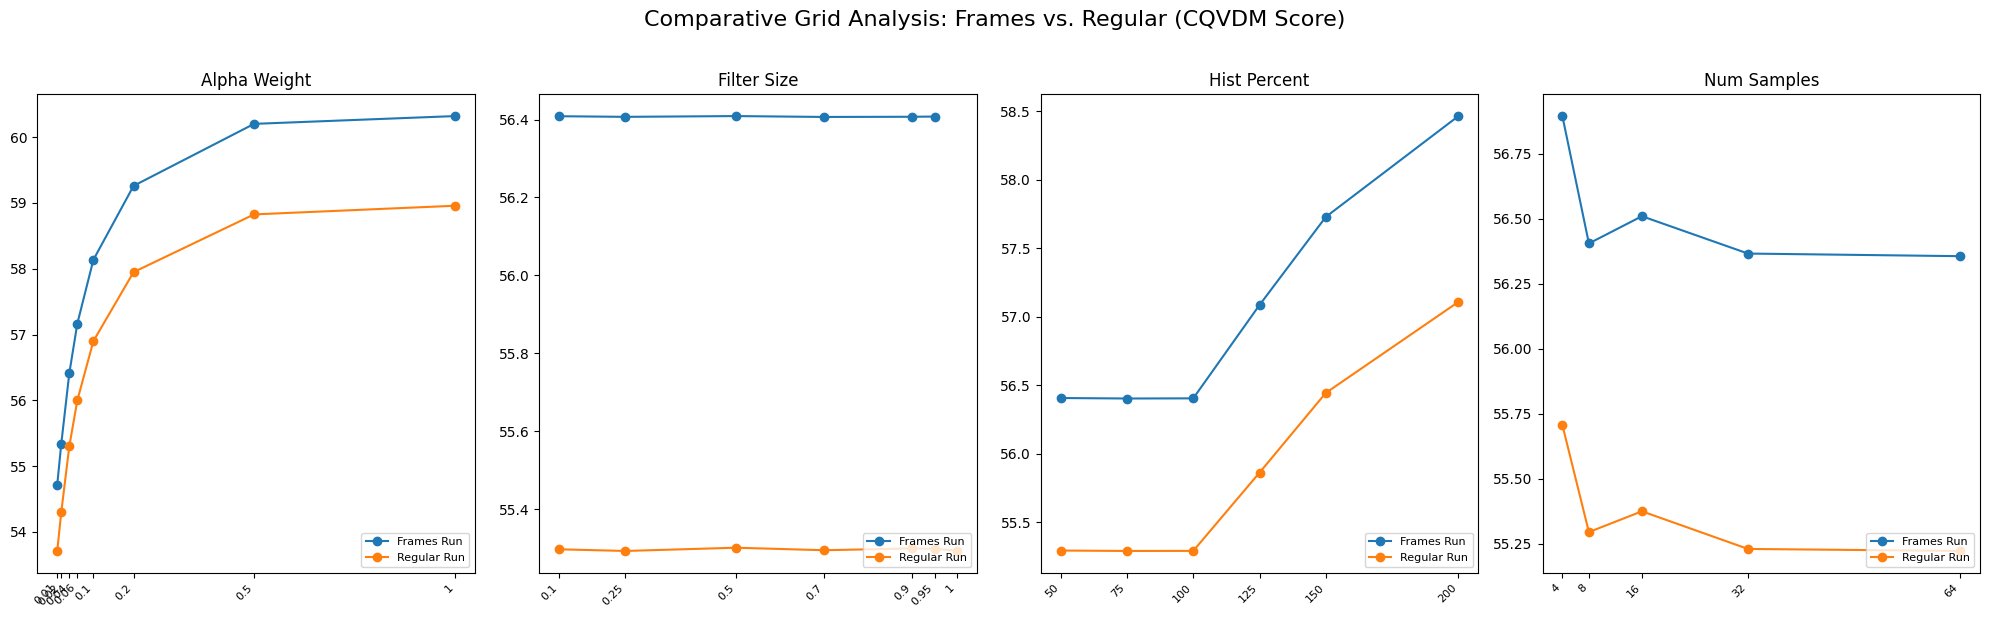

In [10]:
analyze_utils.plot_dual_experiment_grid(
        frames_data=frames_loaded, 
        regular_data=reg_loaded, 
        score_metric="CQVDM Score"
    )

In [23]:
print(frames_summary)
print(reg_summary)

  experiment_type  best_score  best_score_value  worst_score  \
0    Alpha Weight   60.318890               1.0    54.719017   
1     Filter Size   56.408913               0.5    56.406673   
2    Hist Percent   58.465443             200.0    56.404503   
3     Num Samples   56.895821               4.0    56.356915   

   worst_score_value  pearson_correlation  
0               0.01             0.784501  
1               0.70            -0.350621  
2              75.00             0.952373  
3              64.00            -0.604705  
  experiment_type  best_score  best_score_value  worst_score  \
0    Alpha Weight   58.956535               1.0    53.711891   
1     Filter Size   55.301342               0.5    55.293018   
2    Hist Percent   57.109352             200.0    55.291954   
3     Num Samples   55.707298               4.0    55.222965   

   worst_score_value  pearson_correlation  
0               0.01             0.786127  
1               0.25             0.101609  
2     

In [22]:
# 1. Standardize the data types of the score columns in BOTH DataFrames
numeric_cols = ['best_score_value', 'worst_score_value']

# Convert columns to numeric, coercing any non-numeric values (like an accidental string) to NaN
frames_summary[numeric_cols] = frames_summary[numeric_cols].apply(pd.to_numeric, errors='coerce')
reg_summary[numeric_cols] = reg_summary[numeric_cols].apply(pd.to_numeric, errors='coerce')


# 2. Set the 'experiment_type' column as the index (addressing the previous issue)
frames_indexed = frames_summary.set_index('experiment_type')
reg_indexed = reg_summary.set_index('experiment_type')

# 3. Run the comparison on the indexed, clean DataFrames
comparison_table_fixed = frames_indexed.compare(reg_indexed)

# 4. Display the fixed comparison table
display(comparison_table_fixed)

best_score            worst_score             \
                      self      other        self      other   
experiment_type                                                
Alpha Weight     60.318890  58.956535   54.719017  53.711891   
Filter Size      56.408913  55.301342   56.406673  55.293018   
Hist Percent     58.465443  57.109352   56.404503  55.291954   
Num Samples      56.895821  55.707298   56.356915  55.222965   

                worst_score_value       pearson_correlation            
                             self other                self     other  
experiment_type                                                        
Alpha Weight                  NaN   NaN            0.784501  0.786127  
Filter Size                   0.7  0.25           -0.350621  0.101609  
Hist Percent                  NaN   NaN            0.952373  0.951392  
Num Samples                   NaN   NaN           -0.604705 -0.644074

In [21]:
display(comparison_table)

best_score            worst_score            worst_score_value        \
        self      other        self      other              self other   
0  60.318890  58.956535   54.719017  53.711891               NaN   NaN   
1  56.408913  55.301342   56.406673  55.293018               0.7  0.25   
2  58.465443  57.109352   56.404503  55.291954               NaN   NaN   
3  56.895821  55.707298   56.356915  55.222965               NaN   NaN   

  pearson_correlation            
                 self     other  
0            0.784501  0.786127  
1           -0.350621  0.101609  
2            0.952373  0.951392  
3           -0.604705 -0.644074